<a href="https://colab.research.google.com/github/hpan270/MSA/blob/master/Train_Scratch_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Train the ResNet50 with CIFAR10 Images from scratch
- All layer2 in ResNet50 is trainable
- UpSampling2D() for input
- BatchNormalization() in full connected layers  
#### After 5 epoch, the test accuracy is 0.9878
- refer to https://medium.com/@andrew.dabydeen/transfer-learning-using-resnet50-and-cifar-10-6242ed4b4245
- refer to https://github.com/frlim/data2040_final/blob/master/project_2/CNN_Final.ipynb


In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

Using TensorFlow backend.


In [2]:
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [19]:
print(conv_base.trainable)
lyt=[ly.trainable for ly in conv_base.layers]
(np.array(lyt)==True).all()

True


True

In [4]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=5, batch_size=20, validation_data=(x_test, y_test))

W0815 00:42:29.602840 140593514502016 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0815 00:42:32.111951 140593514502016 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 867s 17ms/sample - loss: 0.2486 - acc: 0.9125 - val_loss: 0.1169 - val_acc: 0.9579
Epoch 2/5
50000/50000 [==============================] - 864s 17ms/sample - loss: 0.1573 - acc: 0.9434 - val_loss: 0.0713 - val_acc: 0.9758
Epoch 3/5
50000/50000 [==============================] - 866s 17ms/sample - loss: 0.1189 - acc: 0.9598 - val_loss: 0.0503 - val_acc: 0.9839
Epoch 4/5
50000/50000 [==============================] - 862s 17ms/sample - loss: 0.0943 - acc: 0.9696 - val_loss: 0.0437 - val_acc: 0.9863
Epoch 5/5
50000/50000 [==============================] - 862s 17ms/sample - loss: 0.0751 - acc: 0.9770 - val_loss: 0.0384 - val_acc: 0.9878


In [5]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 40s 4ms/sample - loss: 0.0384 - acc: 0.9878
Test loss: 0.03843357466459274
Test accuracy: 0.98781985


In [0]:
history.history.keys()
type(history.history)
history.history['acc']
import pandas as pd
hist_df = pd.DataFrame(history.history) 
hist_df.head()
model.save('train_res50_e5.h5')
hist_df.to_csv('train_res50_e5.csv')

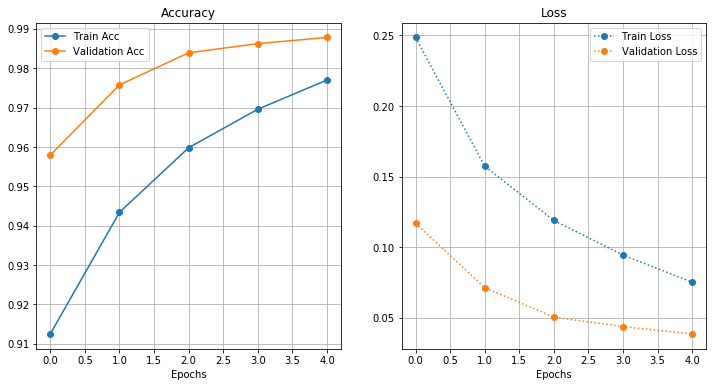

In [7]:
import matplotlib.pylab as plt
f=plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['acc'],'-o', label='Train Acc')
plt.plot(history.epoch, history.history['val_acc'],'-o',label='Validation Acc')  
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.grid()
plt.legend(loc='best')
plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['loss'],':o', label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],':o',label='Validation Loss')  
plt.title("Loss")
plt.xlabel("Epochs")
plt.grid()
plt.legend(loc='best')
f.savefig('train_res50_e5.png')